# Horse Survival

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv("horse.csv")

In [3]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [4]:
df.shape

(299, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hospital_number,299.0,1.087733e+06,1.532032e+06,518476.0,528904.0,530301.0,534736.00,5305629.0
rectal_temp,239.0,3.816862e+01,7.337444e-01,35.4,37.8,38.2,38.50,40.8
pulse,275.0,7.200000e+01,2.864622e+01,30.0,48.0,64.0,88.00,184.0
respiratory_rate,241.0,3.046058e+01,1.766610e+01,8.0,18.0,25.0,36.00,96.0
nasogastric_reflux_ph,53.0,4.707547e+00,1.982311e+00,1.0,3.0,5.0,6.50,7.5
packed_cell_volume,270.0,4.630741e+01,1.043674e+01,23.0,38.0,45.0,52.00,75.0
total_protein,266.0,2.427444e+01,2.736419e+01,3.3,6.5,7.5,56.75,89.0
abdomo_protein,101.0,3.039604e+00,1.967947e+00,0.1,2.0,2.3,3.90,10.1
lesion_1,299.0,3.659709e+03,5.408472e+03,0.0,2111.5,2322.0,3209.00,41110.0
lesion_2,299.0,9.052843e+01,6.506371e+02,0.0,0.0,0.0,0.00,7111.0


In [8]:
df["outcome"].value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

### Missing Value Treatment:

In [9]:
df.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [10]:
df.isna().sum() / len(df) * 100

surgery                   0.000000
age                       0.000000
hospital_number           0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
nasogastric_reflux_ph    82.274247
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        9.698997
total_protein            11.036789
abdomo_appearance        55.183946
abdomo_protein           66.220736
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64

In [ ]:
# Dropping Columns Having More than 50% of Data Missing.

In [12]:
(df.isna().sum() / len(df) * 100)[(df.isna().sum() / len(df) * 100) > 50]

nasogastric_reflux_ph    82.274247
abdomo_appearance        55.183946
abdomo_protein           66.220736
dtype: float64

In [15]:
cols_to_drop = list((df.isna().sum() / len(df) * 100)[(df.isna().sum() / len(df) * 100) > 50].index)

In [16]:
cols_to_drop

['nasogastric_reflux_ph', 'abdomo_appearance', 'abdomo_protein']

In [17]:
df = df.drop(cols_to_drop, axis= 1)

In [18]:
df.shape

(299, 25)

In [19]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,decreased,distend_large,45.0,8.4,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,absent,other,50.0,85.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,normal,normal,33.0,6.7,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,decreased,NaN,48.0,7.2,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,NaN,74.0,7.4,died,no,4300,0,0,no


In [20]:
df["hospital_number"].nunique()

283

In [ ]:
# we can Drop "hospital_numer" as it has mostly Unique values for each Observations.

In [21]:
df = df.drop("hospital_number", axis= 1)

In [22]:
df.shape

(299, 24)

In [23]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,...,decreased,distend_large,45.0,8.4,died,no,11300,0,0,no
1,yes,adult,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,...,absent,other,50.0,85.0,euthanized,no,2208,0,0,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,normal,normal,33.0,6.7,lived,no,0,0,0,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,decreased,NaN,48.0,7.2,died,yes,2208,0,0,yes
4,no,adult,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,...,NaN,NaN,74.0,7.4,died,no,4300,0,0,no


In [24]:
df.isna().sum() / len(df) * 100

surgery                   0.000000
age                       0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        9.698997
total_protein            11.036789
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64

In [25]:
df.dtypes

surgery                   object
age                       object
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [28]:
# Checking Numerical and Categorical Data:

for col in df.columns:
    
    print(f"{col}:")
    print(df[col].value_counts())
    print("\n")

surgery:
yes    180
no     119
Name: surgery, dtype: int64


age:
adult    275
young     24
Name: age, dtype: int64


rectal_temp:
38.0    25
38.5    19
38.3    18
37.8    17
38.2    16
38.1    12
37.5    12
38.6    12
38.4    11
37.9     7
37.2     7
37.6     7
37.7     7
38.7     7
37.3     6
38.8     6
39.2     5
39.5     4
39.3     4
38.9     4
39.0     4
39.4     3
37.1     3
37.4     3
40.3     2
37.0     2
39.1     2
36.5     2
36.9     1
40.8     1
36.6     1
36.1     1
35.4     1
36.0     1
36.8     1
39.6     1
39.9     1
36.4     1
39.7     1
40.0     1
Name: rectal_temp, dtype: int64


pulse:
48.0     27
60.0     25
40.0     18
52.0     12
88.0     12
44.0     11
100.0    11
72.0     11
120.0    10
42.0     10
64.0      8
96.0      8
84.0      8
80.0      8
54.0      7
56.0      7
50.0      6
66.0      6
104.0     5
68.0      5
92.0      4
70.0      4
76.0      4
108.0     3
86.0      3
78.0      3
90.0      3
36.0      3
112.0     3
114.0     2
45.0      2
140.0     2
124.

In [29]:
# "lesion_3" and "lesion_2" can be dropped as it has mostly same values acroos observations:

df = df.drop(["lesion_2","lesion_3"], axis=1)

In [31]:
df.isna().sum() / len(df) * 100

surgery                   0.000000
age                       0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        9.698997
total_protein            11.036789
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
cp_data                   0.000000
dtype: float64

In [30]:
# For Numeric Columns, Filling Missing Values with Mean or Median According to Distribution:

df.describe()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1
count,239.000000,275.000000,241.000000,270.000000,266.000000,299.000000
mean,38.168619,72.000000,30.460581,46.307407,24.274436,3659.709030
std,0.733744,28.646219,17.666102,10.436743,27.364194,5408.472421
min,35.400000,30.000000,8.000000,23.000000,3.300000,0.000000
25%,37.800000,48.000000,18.000000,38.000000,6.500000,2111.500000
50%,38.200000,64.000000,25.000000,45.000000,7.500000,2322.000000
75%,38.500000,88.000000,36.000000,52.000000,56.750000,3209.000000
max,40.800000,184.000000,96.000000,75.000000,89.000000,41110.000000


In [32]:
df["rectal_temp"] = df["rectal_temp"].fillna(38.2)

df["pulse"] = df["pulse"].fillna(64.00)

df["respiratory_rate"] = df["respiratory_rate"].fillna(25.00)

df["packed_cell_volume"] = df["packed_cell_volume"].fillna(45.00)

df["total_protein"] = df["total_protein"].fillna(7.50)

In [33]:
df.isna().sum() / len(df) * 100

surgery                   0.000000
age                       0.000000
rectal_temp               0.000000
pulse                     0.000000
respiratory_rate          0.000000
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        0.000000
total_protein             0.000000
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
cp_data                   0.000000
dtype: float64

In [34]:
# For Numeric Columns, Filling Missing Values with Mode:

df.dtypes

surgery                   object
age                       object
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
cp_data                   object
dtype: object

In [35]:
obj_col = list((df.isna().sum() / len(df) * 100)[(df.isna().sum() / len(df) * 100) > 0].index)

In [36]:
obj_col

['temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen']

In [37]:
for col in obj_col:
    
    df[col] = df[col].fillna(df[col].mode()[0])

In [38]:
df.isna().sum() / len(df) * 100

surgery                  0.0
age                      0.0
rectal_temp              0.0
pulse                    0.0
respiratory_rate         0.0
temp_of_extremities      0.0
peripheral_pulse         0.0
mucous_membrane          0.0
capillary_refill_time    0.0
pain                     0.0
peristalsis              0.0
abdominal_distention     0.0
nasogastric_tube         0.0
nasogastric_reflux       0.0
rectal_exam_feces        0.0
abdomen                  0.0
packed_cell_volume       0.0
total_protein            0.0
outcome                  0.0
surgical_lesion          0.0
lesion_1                 0.0
cp_data                  0.0
dtype: float64

### Feature Engineering:

In [39]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,cp_data
0,no,adult,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,extreme_pain,...,slight,none,decreased,distend_large,45.0,8.4,died,no,11300,no
1,yes,adult,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,mild_pain,...,slight,none,absent,other,50.0,85.0,euthanized,no,2208,no
2,no,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,...,slight,none,normal,normal,33.0,6.7,lived,no,0,yes
3,yes,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,...,none,less_1_liter,decreased,distend_large,48.0,7.2,died,yes,2208,yes
4,no,adult,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,mild_pain,...,slight,none,absent,distend_large,74.0,7.4,died,no,4300,no


In [40]:
# Checking Distributions of Numeric Columns:

df.dtypes

surgery                   object
age                       object
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
cp_data                   object
dtype: object

In [43]:
df.select_dtypes(exclude= "object").columns

Index(['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume',
       'total_protein', 'lesion_1'],
      dtype='object')

In [44]:
num_cols = list(df.select_dtypes(exclude= "object").columns)

In [45]:
num_cols

['rectal_temp',
 'pulse',
 'respiratory_rate',
 'packed_cell_volume',
 'total_protein',
 'lesion_1']

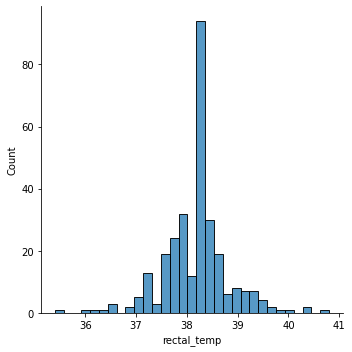

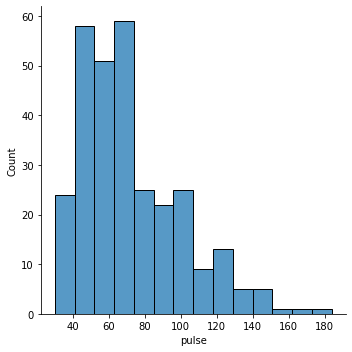

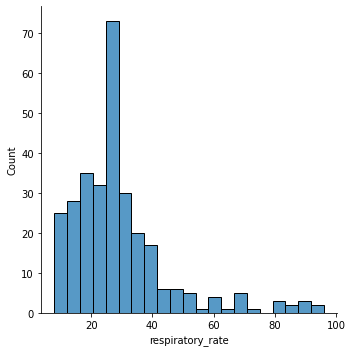

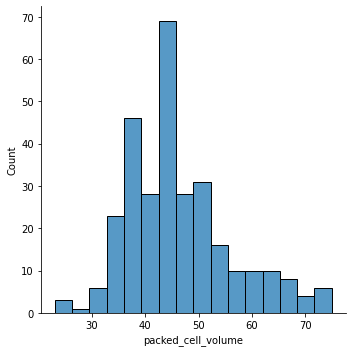

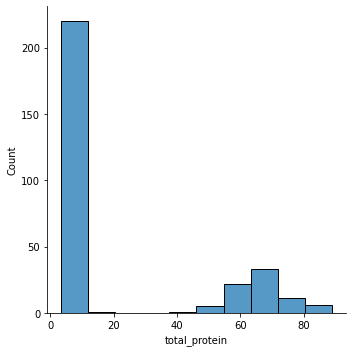

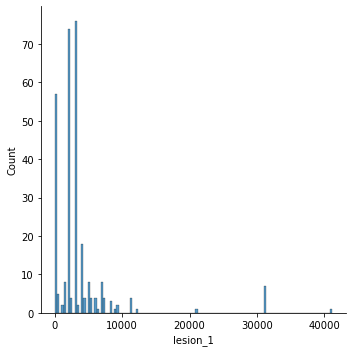

In [46]:
for col in num_cols:
    sns.displot(df[col])
    
plt.show()

In [47]:
# We can Transform "pulse" and "respiratory_rate" using log transform:

df["pulse"] = df["pulse"].apply(np.log1p)

df["respiratory_rate"] = df["respiratory_rate"].apply(np.log1p)

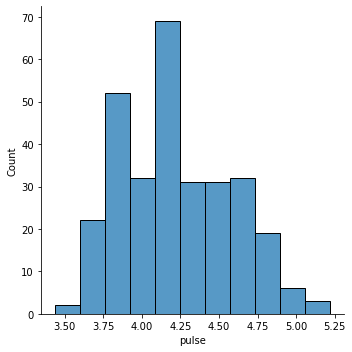

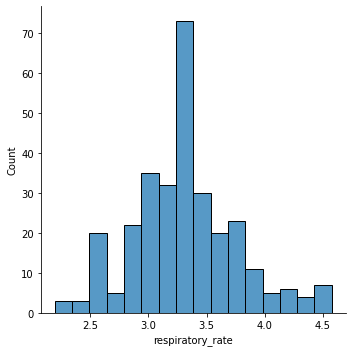

In [48]:
sns.displot(df["pulse"])

sns.displot(df["respiratory_rate"])

plt.show()

In [50]:
# Checking For Outliers in "total_protein" and "lesion_1":

df[["total_protein","lesion_1"]].describe()

,total_protein,lesion_1
count,299.000000,299.000000
mean,22.423077,3659.709030
std,26.336270,5408.472421
min,3.300000,0.000000
25%,6.600000,2111.500000
50%,7.500000,2322.000000
75%,52.000000,3209.000000
max,89.000000,41110.000000


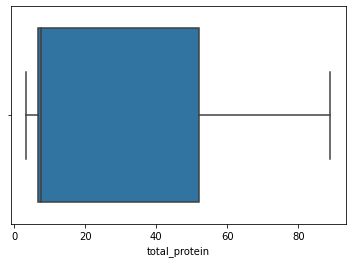

In [54]:
sns.boxplot(data= df, x= "total_protein")

plt.show()

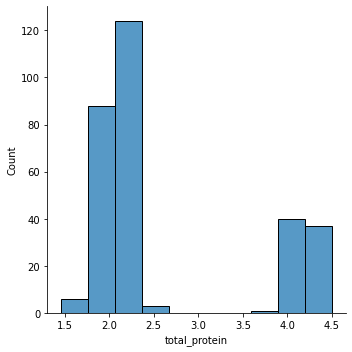

In [62]:
# No Outliers in "total_protein"

# Trying Different Transformations:

sns.displot(df["total_protein"].apply(np.log1p))

In [63]:
df["total_protein"] = df["total_protein"].apply(np.log1p)

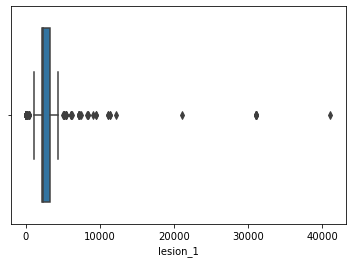

In [64]:
sns.boxplot(data= df, x= "lesion_1")

plt.show()

In [67]:
df[df["lesion_1"] > 10000]

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,cp_data
0,no,adult,38.5,4.204693,3.367296,cool,reduced,normal_pink,more_3_sec,extreme_pain,...,slight,none,decreased,distend_large,45.0,2.240710,died,no,11300,no
74,yes,young,38.2,4.174387,3.258097,cool,normal,normal_pink,less_3_sec,mild_pain,...,slight,none,absent,distend_large,37.0,1.774952,died,yes,11124,no
105,yes,adult,38.2,4.262680,3.610918,normal,normal,pale_pink,more_3_sec,depressed,...,slight,none,absent,distend_large,36.0,2.116256,lived,yes,31110,no
126,yes,adult,38.7,4.174387,3.258097,cool,normal,pale_pink,less_3_sec,extreme_pain,...,slight,none,absent,distend_large,33.0,2.014903,lived,yes,31110,no
185,yes,adult,39.3,4.174387,4.510860,warm,reduced,normal_pink,less_3_sec,mild_pain,...,none,less_1_liter,absent,distend_large,39.0,2.041220,lived,yes,21110,no
188,yes,adult,38.3,4.110874,2.833213,cool,normal,normal_pink,less_3_sec,depressed,...,slight,less_1_liter,normal,distend_small,30.0,1.945910,lived,yes,31110,no
202,no,adult,37.2,3.610918,2.302585,normal,normal,normal_pink,less_3_sec,depressed,...,slight,none,absent,normal,35.0,1.902108,lived,no,31110,no
244,no,adult,38.2,4.574711,3.258097,cool,reduced,pale_pink,more_3_sec,extreme_pain,...,slight,none,absent,distend_large,60.0,2.140066,died,yes,41110,no
258,yes,adult,40.8,4.290459,3.761200,cool,reduced,normal_pink,less_3_sec,depressed,...,slight,none,absent,distend_large,54.0,2.128232,died,yes,11400,yes
262,yes,adult,37.1,4.330733,3.610918,cool,normal,pale_pink,more_3_sec,severe_pain,...,slight,more_1_liter,absent,distend_small,48.0,2.128232,died,yes,12208,yes


In [68]:
# We can Drop these 14 Rows:

df[df["lesion_1"] > 10000].index

Int64Index([0, 74, 105, 126, 185, 188, 202, 244, 258, 262, 268, 273, 284, 291], dtype='int64')

In [70]:
df = df.drop(df[df["lesion_1"] > 10000].index, axis= 0)

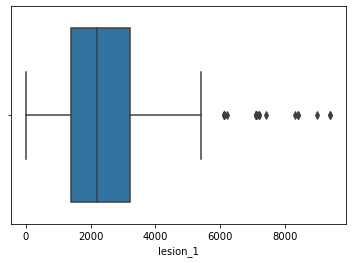

In [71]:
sns.boxplot(data= df, x= "lesion_1")

plt.show()

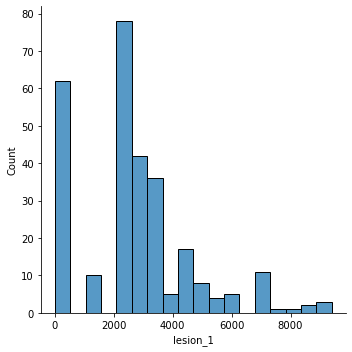

In [72]:
sns.displot(data= df, x= "lesion_1")

plt.show()

### Dummies For Categorical variables and Train Test Split:

In [78]:
df.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,lesion_1,cp_data
1,yes,adult,39.2,4.488636,3.044522,cool,normal,pale_cyanotic,less_3_sec,mild_pain,...,slight,none,absent,other,50.0,4.454347,euthanized,no,2208,no
2,no,adult,38.3,3.713572,3.218876,normal,normal,pale_pink,less_3_sec,mild_pain,...,slight,none,normal,normal,33.0,2.041220,lived,no,0,yes
3,yes,young,39.1,5.105945,4.442651,cold,normal,dark_cyanotic,more_3_sec,depressed,...,none,less_1_liter,decreased,distend_large,48.0,2.104134,died,yes,2208,yes
4,no,adult,37.3,4.653960,3.583519,cool,normal,dark_cyanotic,more_3_sec,mild_pain,...,slight,none,absent,distend_large,74.0,2.128232,died,no,4300,no
5,no,adult,38.2,4.174387,3.258097,warm,normal,pale_pink,less_3_sec,depressed,...,slight,none,decreased,firm,45.0,2.140066,lived,no,0,no


In [79]:
pd.get_dummies(df.drop("outcome", axis= 1), drop_first= True)

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,surgery_yes,age_young,temp_of_extremities_cool,temp_of_extremities_normal,...,nasogastric_reflux_none,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,surgical_lesion_yes,cp_data_yes
1,39.2,4.488636,3.044522,50.0,4.454347,2208,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,38.3,3.713572,3.218876,33.0,2.041220,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
3,39.1,5.105945,4.442651,48.0,2.104134,2208,1,1,0,0,...,0,1,0,0,0,0,0,0,1,1
4,37.3,4.653960,3.583519,74.0,2.128232,4300,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,38.2,4.174387,3.258097,45.0,2.140066,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,38.2,4.795791,4.262680,55.0,4.189655,3205,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
295,37.2,4.290459,3.218876,44.0,2.140066,2208,0,0,1,0,...,1,0,0,0,1,0,0,0,1,1
296,37.5,4.290459,3.433987,60.0,2.054124,3205,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
297,36.5,4.615121,3.218876,50.0,1.945910,2208,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1


In [80]:
# Features:

x = pd.get_dummies(df.drop("outcome", axis= 1), drop_first= True)

In [81]:
x.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,surgery_yes,age_young,temp_of_extremities_cool,temp_of_extremities_normal,...,nasogastric_reflux_none,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,surgical_lesion_yes,cp_data_yes
1,39.2,4.488636,3.044522,50.0,4.454347,2208,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,38.3,3.713572,3.218876,33.0,2.041220,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
3,39.1,5.105945,4.442651,48.0,2.104134,2208,1,1,0,0,...,0,1,0,0,0,0,0,0,1,1
4,37.3,4.653960,3.583519,74.0,2.128232,4300,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,38.2,4.174387,3.258097,45.0,2.140066,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0


In [82]:
y = df["outcome"]

In [83]:
y.head()

1    euthanized
2         lived
3          died
4          died
5         lived
Name: outcome, dtype: object

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [85]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(228, 44)
(57, 44)
(228,)
(57,)


### Scalling:

In [86]:
sc = StandardScaler()

In [87]:
temp = sc.fit_transform(x_train)
x_train = pd.DataFrame(temp, columns= x_train.columns)
x_train.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,surgery_yes,age_young,temp_of_extremities_cool,temp_of_extremities_normal,...,nasogastric_reflux_none,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,surgical_lesion_yes,cp_data_yes
0,0.058702,0.129838,-1.112010,1.323974,-0.548518,-0.664754,0.829993,-0.29277,0.899735,-0.597614,...,0.57735,-0.411377,-0.225147,-0.482112,-0.411377,-0.225147,-0.318511,-0.274721,0.785507,-0.72111
1,0.214331,0.208040,0.265048,-0.352786,-0.611716,0.170138,0.829993,-0.29277,-1.111438,-0.597614,...,0.57735,2.430862,-0.225147,-0.482112,-0.411377,-0.225147,-0.318511,-0.274721,0.785507,1.38675
2,1.303734,-0.118713,0.905896,-0.451419,-0.548518,1.091887,-1.204829,-0.29277,-1.111438,1.673320,...,0.57735,2.430862,-0.225147,-0.482112,-0.411377,4.441539,-0.318511,-0.274721,-1.273063,1.38675
3,0.836847,-0.914162,-0.228017,-1.240482,1.556022,-1.347893,-1.204829,-0.29277,0.899735,-0.597614,...,0.57735,-0.411377,-0.225147,2.074205,-0.411377,-0.225147,-0.318511,-0.274721,-1.273063,-0.72111
4,0.058702,1.630589,-0.138118,1.028075,-1.002320,0.216006,0.829993,-0.29277,-1.111438,-0.597614,...,0.57735,-0.411377,-0.225147,-0.482112,-0.411377,-0.225147,-0.318511,-0.274721,0.785507,1.38675


In [88]:
temp = sc.transform(x_test)
x_test = pd.DataFrame(temp, columns= x_test.columns)
x_test.head()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,surgery_yes,age_young,temp_of_extremities_cool,temp_of_extremities_normal,...,nasogastric_reflux_none,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,surgical_lesion_yes,cp_data_yes
0,-0.096927,-0.033401,-1.726909,-0.254153,-0.750918,-0.311474,0.829993,-0.29277,0.899735,-0.597614,...,0.57735,-0.411377,4.441539,-0.482112,-0.411377,-0.225147,-0.318511,-0.274721,0.785507,1.38675
1,-1.030701,-0.693258,-1.726909,-1.043216,1.522925,-1.347893,-1.204829,-0.29277,-1.111438,1.673320,...,0.57735,2.430862,-0.225147,-0.482112,-0.411377,-0.225147,-0.318511,-0.274721,-1.273063,-0.72111
2,2.081879,-0.297508,-2.109820,-0.845950,1.435272,-1.347893,-1.204829,-0.29277,0.899735,-0.597614,...,0.57735,2.430862,-0.225147,-0.482112,-0.411377,-0.225147,-0.318511,-0.274721,-1.273063,-0.72111
3,-0.252556,0.358213,-0.857065,2.408936,-0.189034,-0.269998,0.829993,-0.29277,0.899735,-0.597614,...,0.57735,-0.411377,-0.225147,-0.482112,-0.411377,-0.225147,-0.318511,-0.274721,0.785507,1.38675
4,0.836847,-0.693258,-0.627660,-1.339115,1.762248,-1.347893,-1.204829,-0.29277,-1.111438,-0.597614,...,0.57735,-0.411377,-0.225147,2.074205,-0.411377,-0.225147,3.139609,-0.274721,-1.273063,-0.72111


### Models:

#### 1) Decision Tree:

In [90]:
model1 = DecisionTreeClassifier()

In [97]:
param_dict = {"criterion" : ["gini", "entropy"],
             "splitter" : ["best","random"]}

In [98]:
grid_model = GridSearchCV(estimator= model1, param_grid=param_dict, cv= 5)

In [99]:
grid_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [100]:
grid_model.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [101]:
grid_model.best_params_

{'criterion': 'entropy', 'splitter': 'best'}

In [102]:
grid_model.best_score_

0.6536231884057971

In [103]:
pred = grid_model.predict(x_test)

In [104]:
accuracy_score(y_test,pred)

0.7017543859649122

In [106]:
confusion_matrix(y_test,pred)

array([[ 8,  1,  3],
       [ 1,  1,  4],
       [ 6,  2, 31]], dtype=int64)

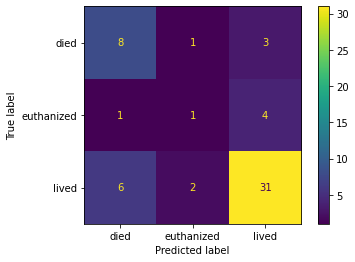

In [107]:
plot_confusion_matrix(grid_model, x_test, y_test)
plt.show()

In [108]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        died       0.53      0.67      0.59        12
  euthanized       0.25      0.17      0.20         6
       lived       0.82      0.79      0.81        39

    accuracy                           0.70        57
   macro avg       0.53      0.54      0.53        57
weighted avg       0.70      0.70      0.70        57



#### 2) Random Forest:

In [111]:
rfc = RandomForestClassifier()

In [112]:
param_dict = {"n_estimators" : [1,10,50,100,200],
             "criterion" : ["gini", "entropy"],
             "max_features" : [2,3,4],
             "bootstrap" : [True, False],
             "oob_score" : [True,False]}

In [113]:
grid_model = GridSearchCV(estimator= rfc, param_grid= param_dict, cv= 5)

In [114]:
grid_model.fit(x_train, y_train)

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_for

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_for

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_for

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [2, 3, 4],
                         'n_estimators': [1, 10, 50, 100, 200],
                         'oob_score': [True, False]})

In [115]:
grid_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_features=4)

In [116]:
grid_model.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 4,
 'n_estimators': 100,
 'oob_score': False}

In [117]:
grid_model.best_score_

0.7149758454106281

In [118]:
pred = grid_model.predict(x_test)

In [119]:
accuracy_score(y_test, pred)

0.7017543859649122

In [120]:
confusion_matrix(y_test, pred)

array([[ 5,  2,  5],
       [ 2,  1,  3],
       [ 3,  2, 34]], dtype=int64)

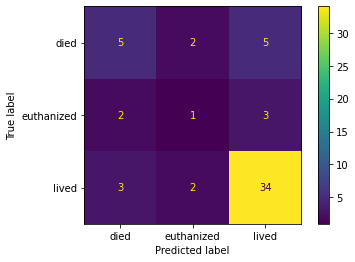

In [121]:
plot_confusion_matrix(grid_model, x_test, y_test)
plt.show()

In [122]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        died       0.50      0.42      0.45        12
  euthanized       0.20      0.17      0.18         6
       lived       0.81      0.87      0.84        39

    accuracy                           0.70        57
   macro avg       0.50      0.49      0.49        57
weighted avg       0.68      0.70      0.69        57

